In [1]:
import pandas as pd
df = pd.read_csv('office_building.csv')
df.head()

,space,offices,entrances,age,value
0,2310,2,2.0,20,142000
1,2333,2,2.0,12,144000
2,2356,3,1.5,33,151000
3,2379,3,2.0,43,150000
4,2402,2,3.0,53,139000


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 5 columns):
space        11 non-null int64
offices      11 non-null int64
entrances    11 non-null float64
age          11 non-null int64
value        11 non-null int64
dtypes: float64(1), int64(4)
memory usage: 520.0 bytes


In [3]:
df.corr()

,space,offices,entrances,age,value
space,1.000000,0.223607,0.620453,0.221437,0.328876
offices,0.223607,1.000000,0.310714,-0.052266,0.874233
entrances,0.620453,0.310714,1.000000,-0.050568,0.510751
age,0.221437,-0.052266,-0.050568,1.000000,-0.447849
value,0.328876,0.874233,0.510751,-0.447849,1.000000


In [4]:
X = df[['space', 'offices', 'entrances', 'age']]
y = df['value']

In [6]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, y)
model.coef_

array([   27.64138737, 12529.76816709,  2553.21066039,  -234.23716447])

In [7]:
model.intercept_

52317.83050729081

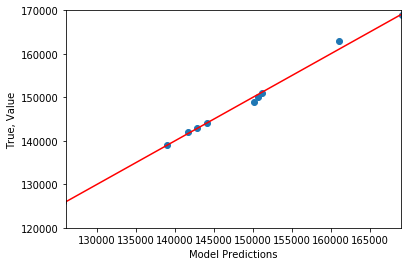

In [10]:
import matplotlib.pyplot as plt
plt.scatter(model.predict(X), y)
plt.xlim(126000, 169000)
plt.ylim(120000, 170000)
plt.plot([126000, 169000], [126000, 169000], 'k-', color='r')
plt.xlabel('Model Predictions')
plt.ylabel('True, Value')
plt.show()

In [11]:
predictions = model.predict(X)

In [12]:
from scipy.stats.stats import pearsonr
pearsonr(predictions, y)

(0.9983726725950134, 1.652112096356407e-12)

In [13]:
error = predictions - y
rmse = (error**2).mean()**.5
mae = abs(error).mean()
print('rmse: ', str(rmse))
print('mae: ', str(mae))

rmse:  716.8197006857947
mae:  477.6373528804186


In [16]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
print('rmse: ', str(mean_squared_error(predictions, y)**0.5))
print('mae: ', str(mean_absolute_error(predictions, y)))

rmse:  716.8197006857947
mae:  477.6373528804186


In [17]:
r2_score(predictions, y)

0.9967373833335269